In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mpg.csv',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# Data Exploration (exploratory data analysis or EDA)

In [3]:
#Display The head ==> To Check if Data is Properly Imported
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
#To check the shape of the dataset
df.shape # (rows, columns)

(398, 9)

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# As we can see there are lot of "?" present inplace where no data is given thus 
# we have to replace it by NaN values for further evaluation.... 
df.replace("?",np.NaN,inplace=True)
# checking the fist 10 rows of the dataset.....
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [7]:
#coverting object into float datatype
df["horsepower"] = df.horsepower.astype(float)

In [8]:
# check for duplicates
print('sum of duplicated values{}\n'.format(df.duplicated().sum()))

sum of duplicated values0



In [9]:
# Are there any missing values?
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

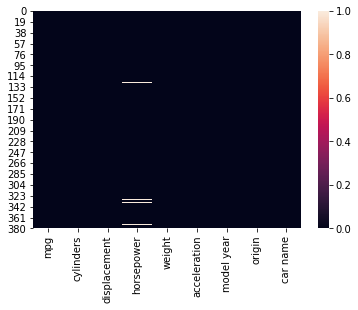

In [10]:
#heatmap for null values
sns.heatmap(df.isnull())

In [11]:
#Lets describe the dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
#number of unique value in each features
for col in df.columns.values:
    print("number of unique valuse of {} : {}".format(col, df[col].nunique()))

number of unique valuse of mpg : 129
number of unique valuse of cylinders : 5
number of unique valuse of displacement : 82
number of unique valuse of horsepower : 93
number of unique valuse of weight : 351
number of unique valuse of acceleration : 95
number of unique valuse of model year : 13
number of unique valuse of origin : 3
number of unique valuse of car name : 305


# Univariate  Analysis

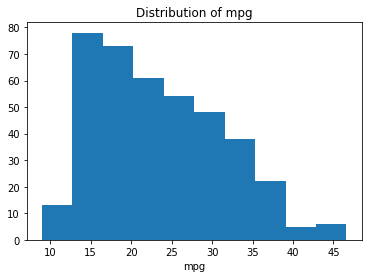

In [13]:
# matplotlib plots inline  
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['mpg'])
plt.xlabel('mpg')
plt.title('Distribution of mpg')

plt.show()


mpg field is right skewed and values of miles per gallon lies between 15 to 40 approximate.

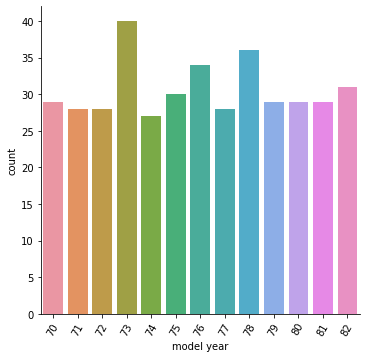

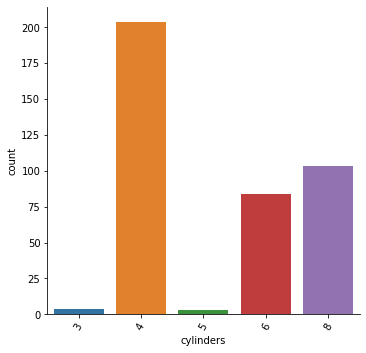

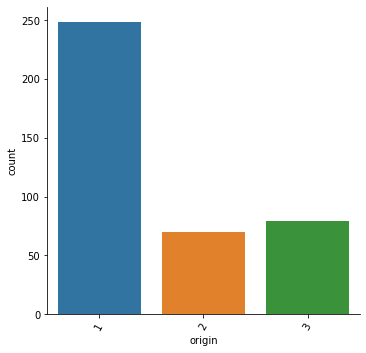

In [14]:
for i in ['model year','cylinders','origin']:
    sns.catplot(x=i,kind='count',data=df,)
    plt.xticks(rotation=60)
    plt.xlabel(i)

##### Conclusion:

>> Most number of cars are having model year = 73.
>> Most number of cars are having 4 cylinders.
>> It comes from origion 1.

mpg                AxesSubplot(0.125,0.657941;0.227941x0.222059)
cylinders       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
displacement    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
horsepower         AxesSubplot(0.125,0.391471;0.227941x0.222059)
weight          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
acceleration    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
model year            AxesSubplot(0.125,0.125;0.227941x0.222059)
origin             AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

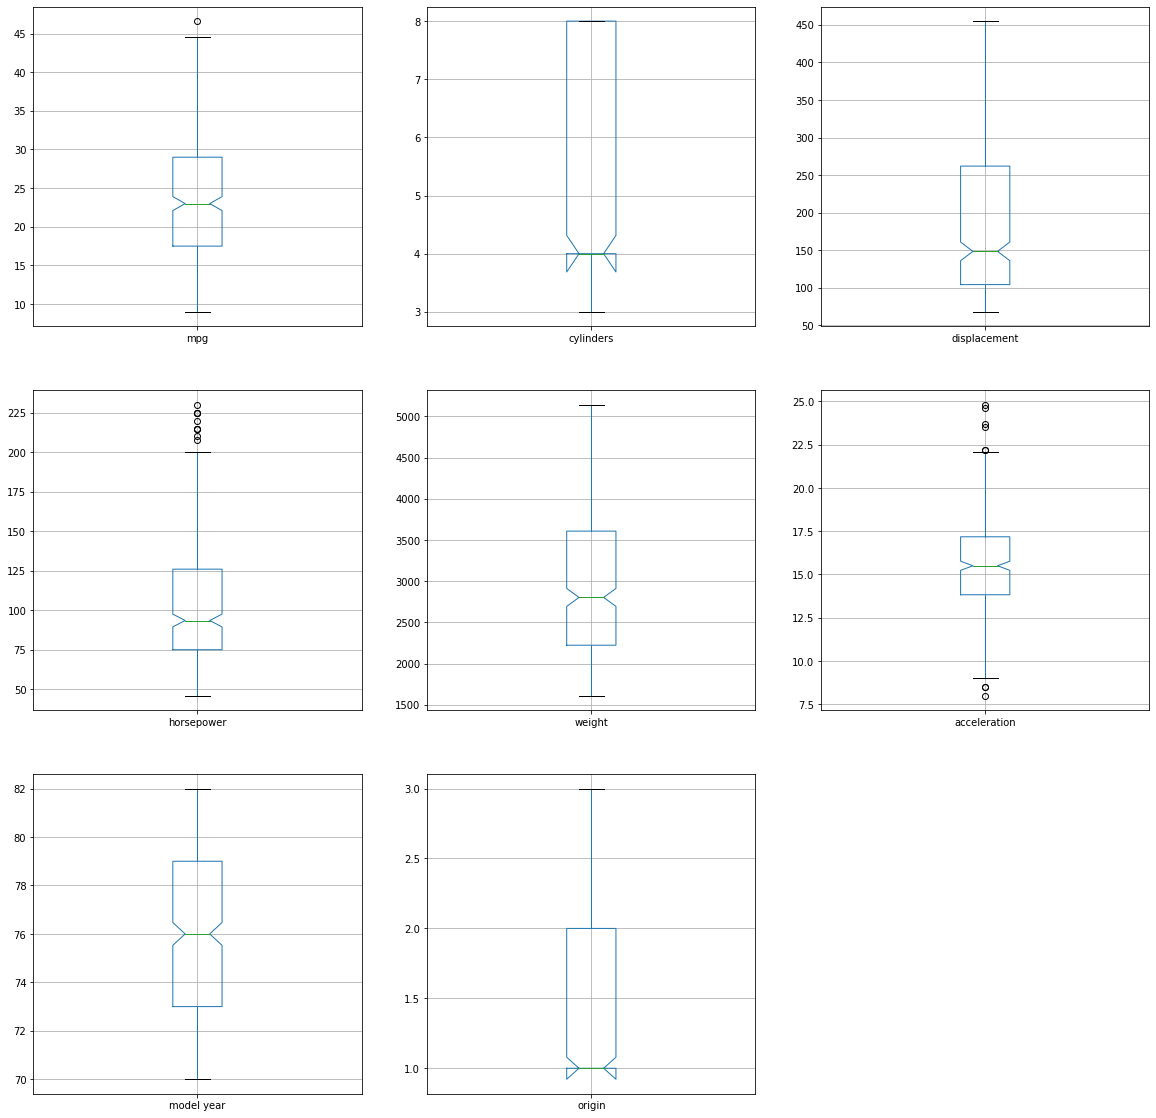

In [15]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0725D8508>,
      dtype=object)

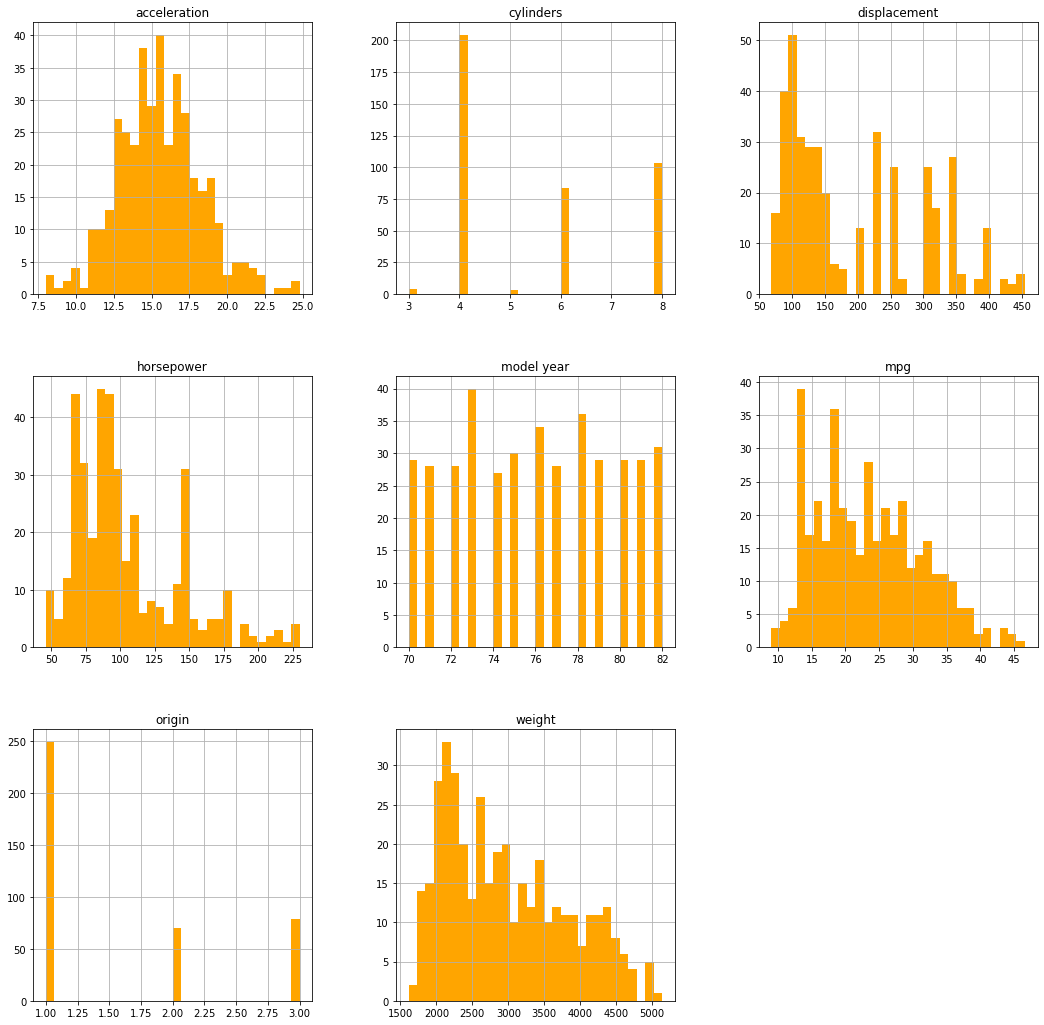

In [16]:
#plotting histograms for checking normal distribution
df.hist(figsize=(18,18),grid=True,layout=(3,3),bins=30,color='orange')

# Bivariate  Analysis

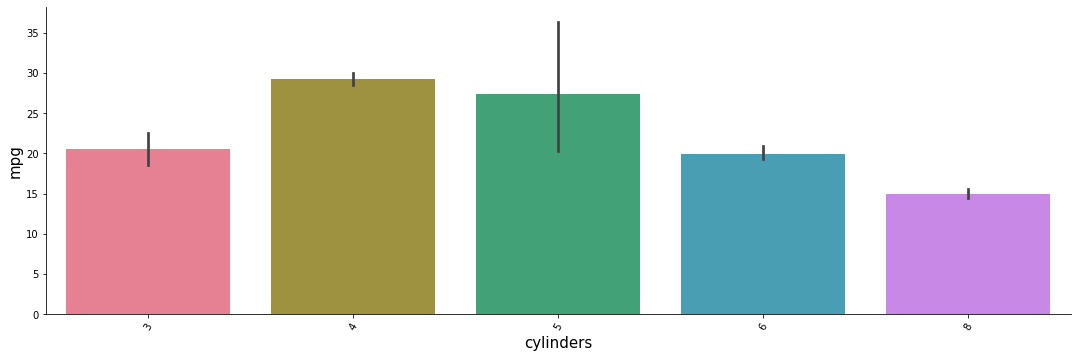

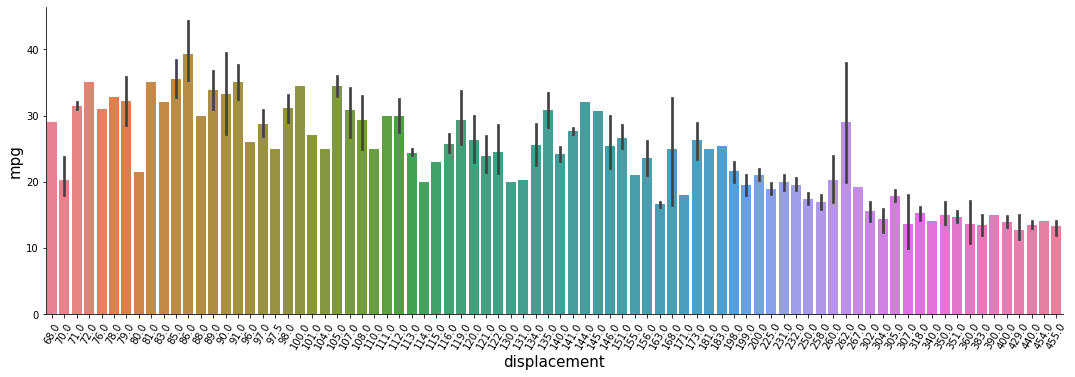

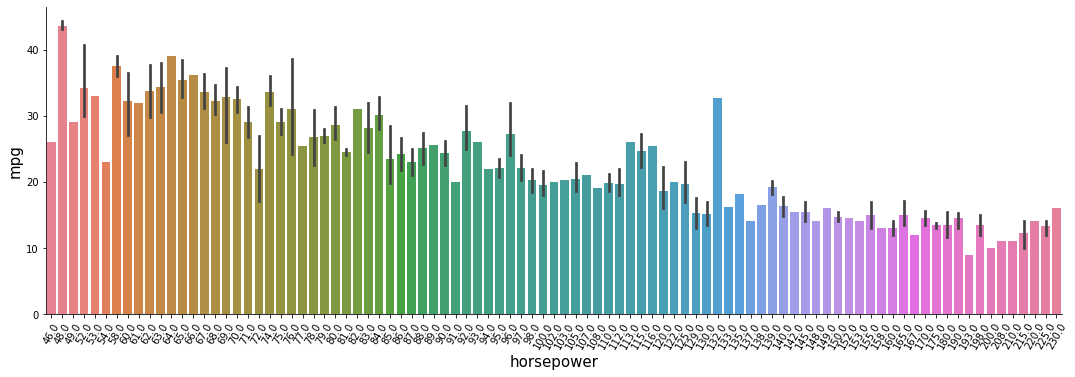

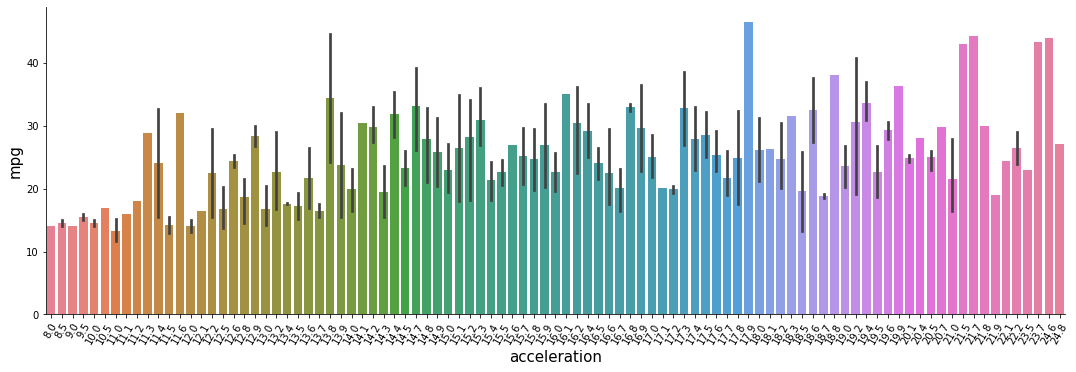

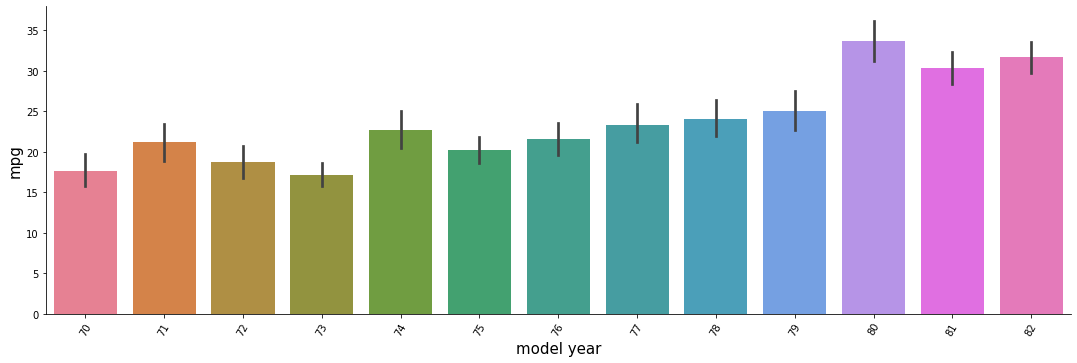

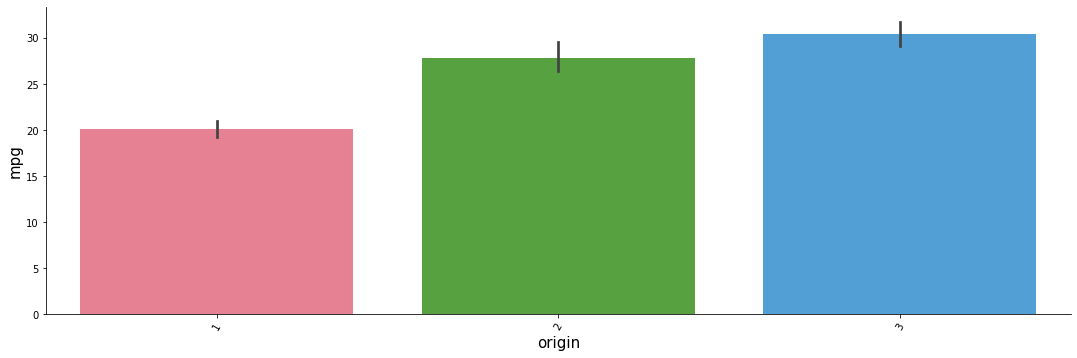

In [17]:
for i in df.drop(['mpg','car name','weight'],axis=1).columns.values:
    sns.catplot(x=i,y='mpg',data=df,height=5,aspect=3,palette='husl',kind='bar')
    plt.xlabel(i,fontsize=15)
    plt.xticks(rotation=60)
    plt.ylabel('mpg',fontsize=15)

1) It is clear that we have more miles per gallon if we use 4 cylinder car.
2) 
3) Cars having model year=80 gives more mpg.
4) Cars of origin category = 3 , gives more mpg.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 <a list of 93 Text xticklabel objects>)

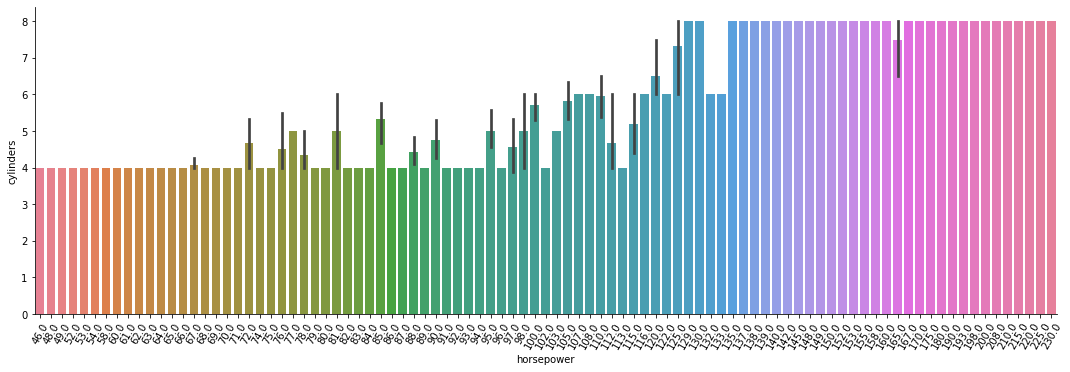

In [18]:
sns.catplot(x='horsepower',y='cylinders',data=df,height=5,aspect=3,palette='husl',kind='bar')
plt.xticks(rotation=60)

More the number of cylinders, means more the horsepower.

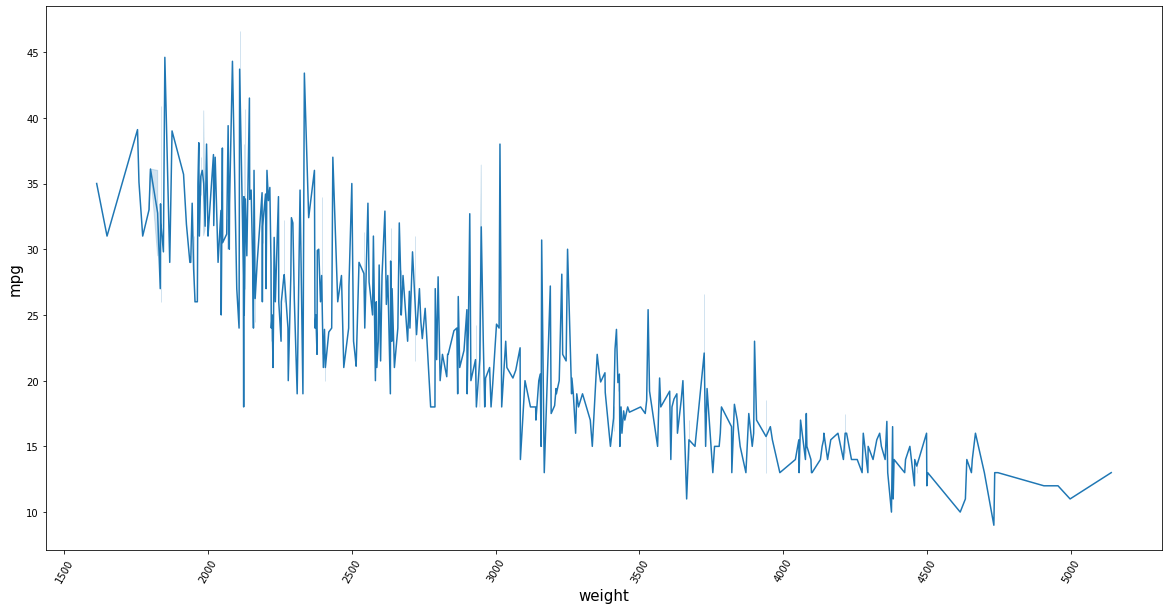

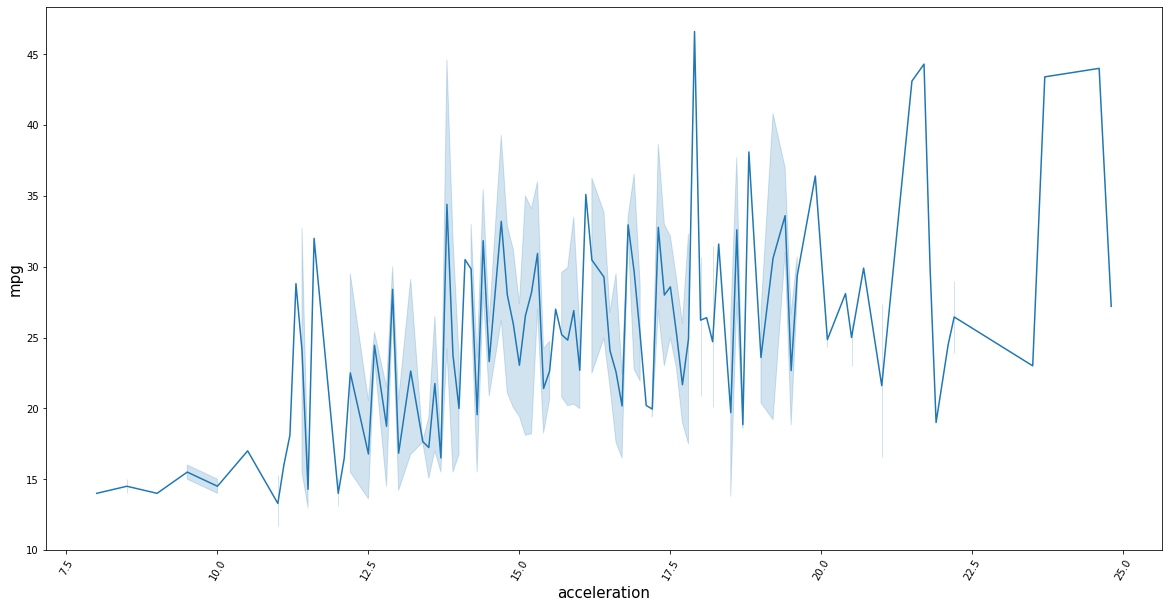

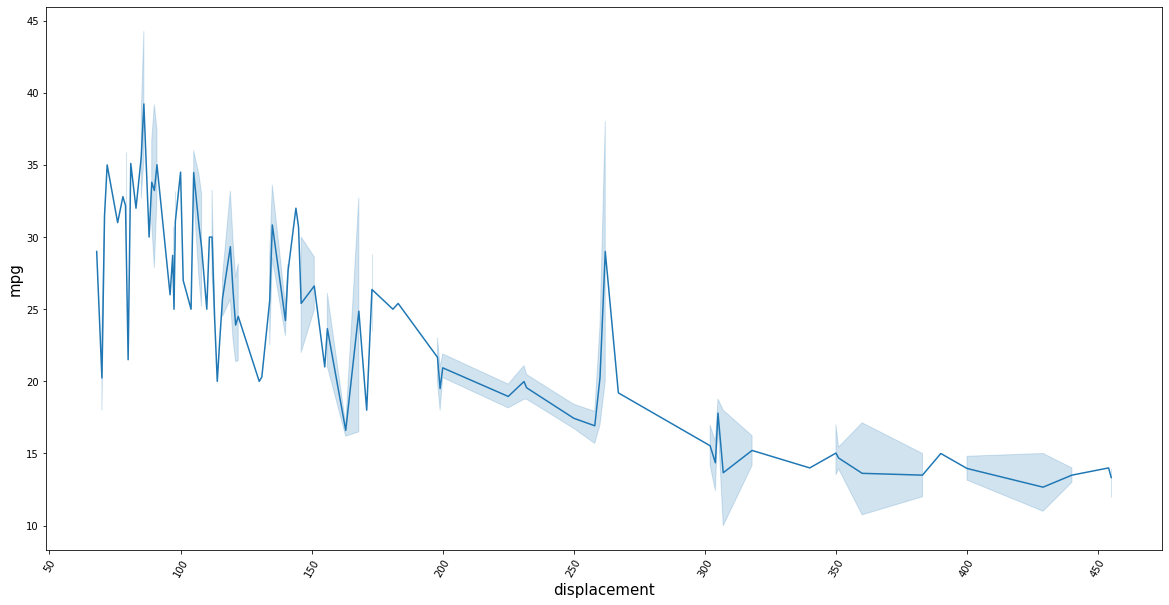

In [19]:
for i in ['weight','acceleration','displacement']:
    plt.subplots(figsize=(20,10))
    sns.lineplot(x=i,y='mpg',data=df,palette='husl')
    plt.xlabel(i,fontsize=15)
    plt.xticks(rotation=60)
    plt.ylabel('mpg',fontsize=15)

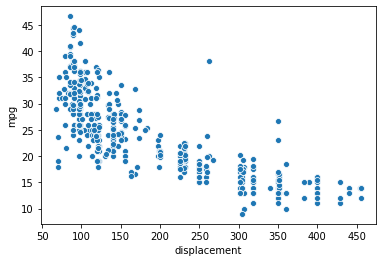

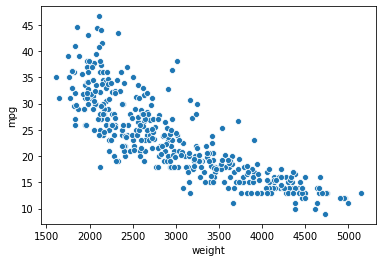

In [20]:
#show scatter plots
#scatter plots against y
#show scatter plots between displacement, weight and mpg....
for i in ["displacement", "weight"]:
    sns.scatterplot(x=i, y="mpg",data=df)
    plt.show()

Displacement and Weight are inversely proportional to each other.

<Figure size 1440x360 with 0 Axes>

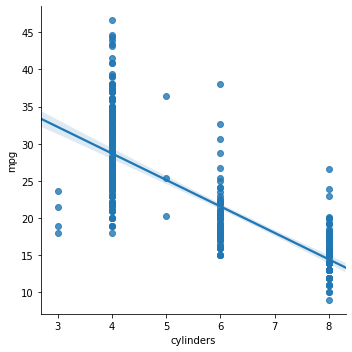

<Figure size 1440x360 with 0 Axes>

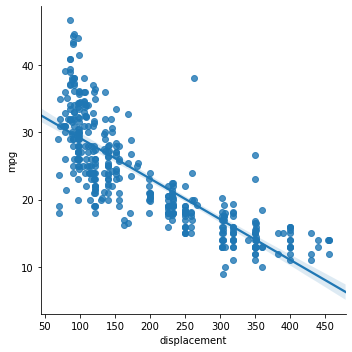

<Figure size 1440x360 with 0 Axes>

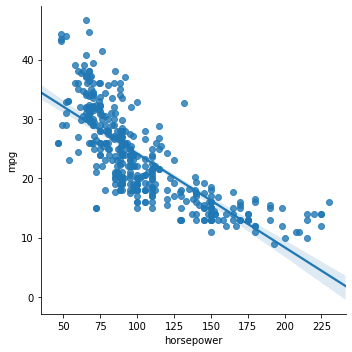

<Figure size 1440x360 with 0 Axes>

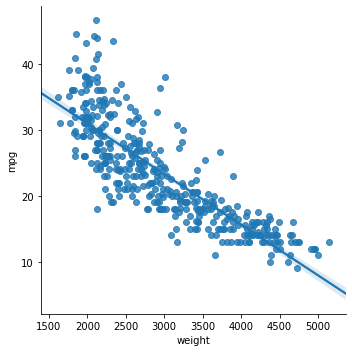

<Figure size 1440x360 with 0 Axes>

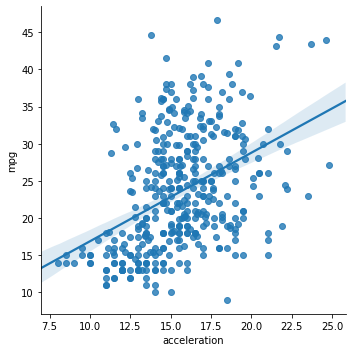

<Figure size 1440x360 with 0 Axes>

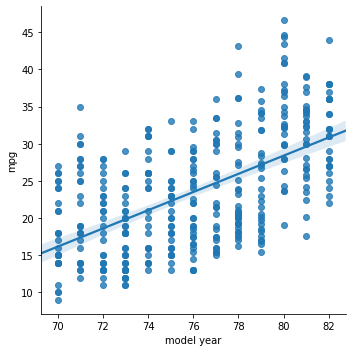

In [21]:
m=df.drop(['mpg','car name','origin'],axis=1).columns.values
for i in m:
    plt.figure(figsize=(20,5))
    sns.lmplot(x=i,y="mpg",data=df);
    plt.tight_layout()

Text(0.5, 1.0, 'car name v mpg')

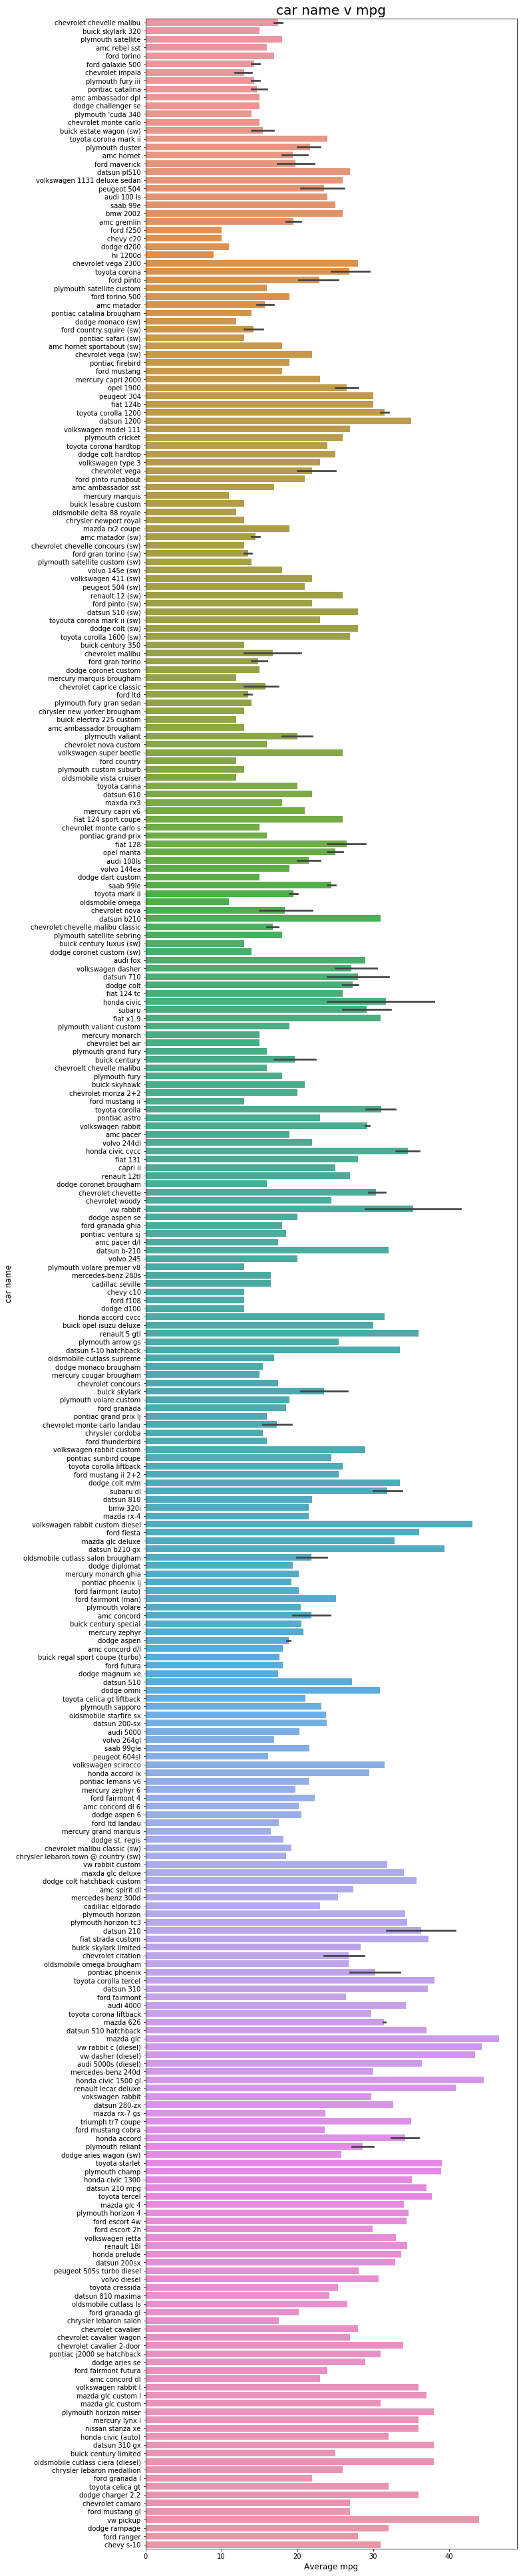

In [22]:
#lets check car name vs mpg
#lets check in which region the average Price is more monthly
plt.figure(figsize=(10,70))
sns.barplot(x='mpg',y='car name',data=df)
plt.ylabel('car name',{'fontsize' : 'large'})
plt.xlabel('Average mpg',{'fontsize':'large',})
plt.title("car name v mpg",{'fontsize':20})

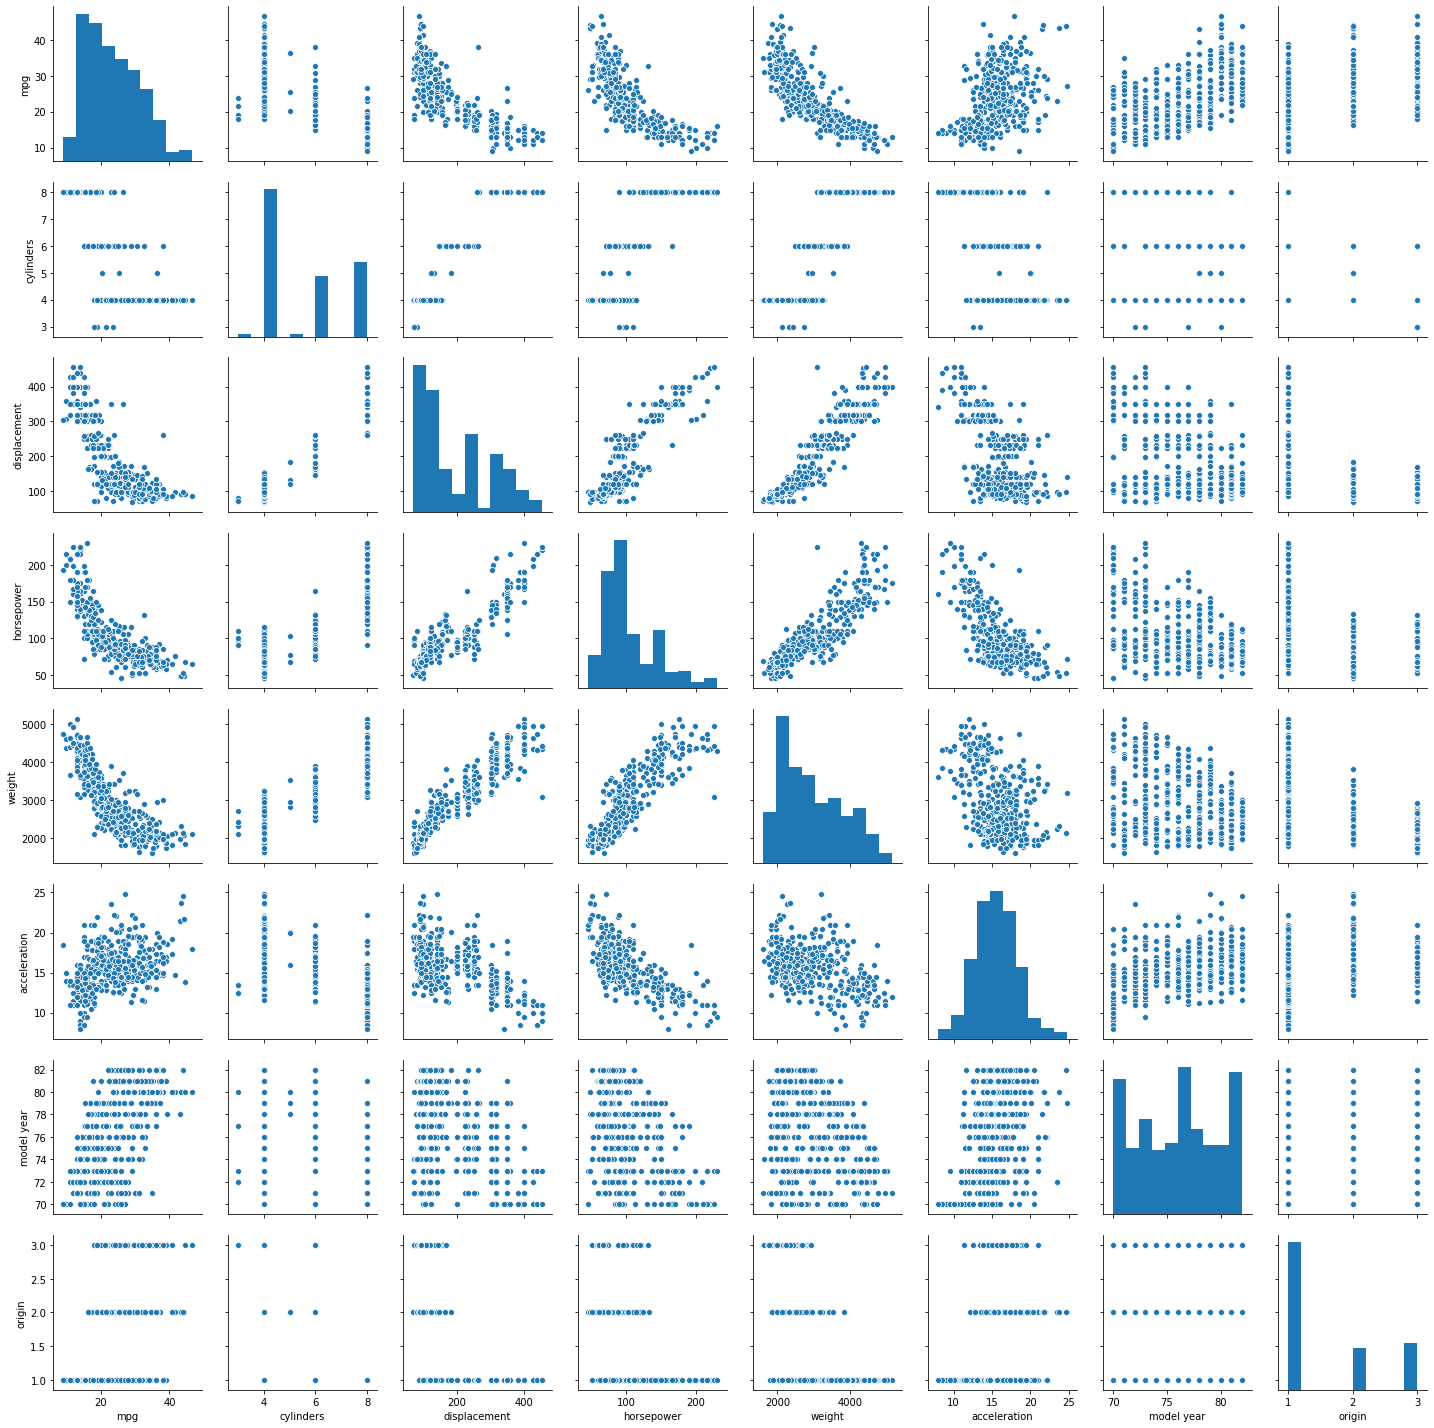

In [24]:
sns.pairplot(df)

In [25]:
# Dropping the Nan values as they are vaery less in number....
df.dropna(inplace=True)

In [26]:
#checking skewness values
df.skew()
#From below output it is clear that skewness exist

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
dtype: float64

In [27]:
# using Label Encoding to change the value of car name in binary format
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
df['car name']=le.fit_transform(df['car name'])

In [28]:
#lets remove the skewness
for i in df.drop(['mpg'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.5:
        df[i]=np.square(df[i])

In [29]:
#lets again check the skewness
df.skew()
#skewness still due to outliers

mpg             0.457092
cylinders       0.508109
displacement    0.214231
horsepower      0.377557
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.790401
car name        0.016312
dtype: float64

In [30]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_mpg=df.loc[(z<3).all(axis=1)]
print(df_mpg.shape)

(392, 9)
(390, 9)


mpg             0.444606
cylinders       0.499724
displacement    0.207027
horsepower      0.379944
weight          0.517126
acceleration    0.165320
model year      0.026133
origin          0.800181
car name        0.021474
dtype: float64

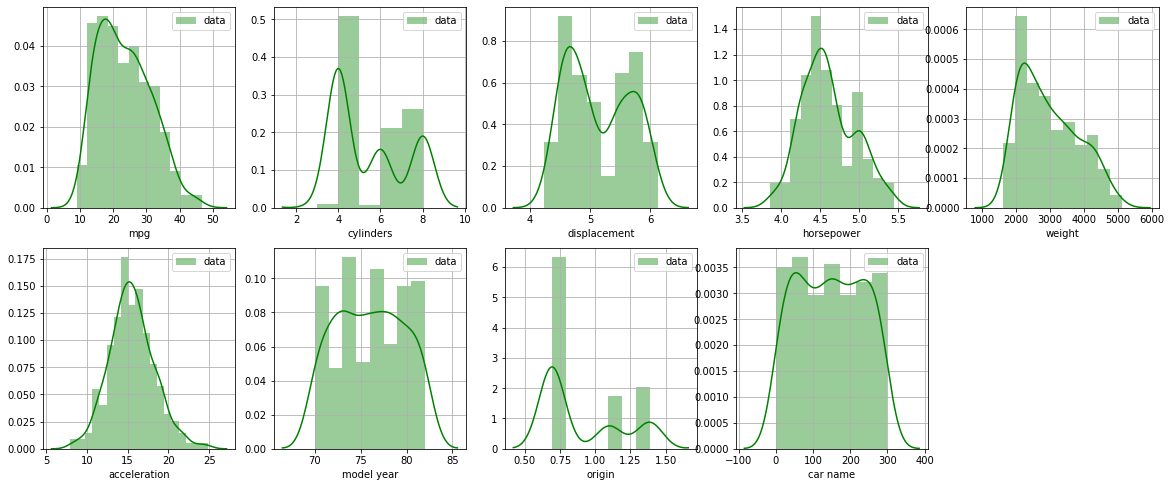

In [31]:
# Checking the Normal Distribution using distplot after removing skewness
plt.figure(figsize=(20,17))
for i,col in enumerate(list(df_mpg.columns.values)):
    plt.subplot(4,5,i+1)
    sns.distplot(df[col],color='g',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout

#lets again check the skewness after removing outliers
df_mpg.skew()

In [32]:
# Checking the correlation
df_mpg.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1,-0.78,-0.83,-0.82,-0.83,0.41,0.58,0.57,0.26
cylinders,-0.78,1,0.94,0.84,0.9,-0.51,-0.34,-0.58,-0.27
displacement,-0.83,0.94,1,0.87,0.94,-0.5,-0.33,-0.69,-0.31
horsepower,-0.82,0.84,0.87,1,0.88,-0.7,-0.39,-0.49,-0.26
weight,-0.83,0.9,0.94,0.88,1,-0.42,-0.31,-0.6,-0.25
acceleration,0.41,-0.51,-0.5,-0.7,-0.42,1,0.28,0.22,0.12
model year,0.58,-0.34,-0.33,-0.39,-0.31,0.28,1,0.17,0.067
origin,0.57,-0.58,-0.69,-0.49,-0.6,0.22,0.17,1,0.37
car name,0.26,-0.27,-0.31,-0.26,-0.25,0.12,0.067,0.37,1


(9.0, 0.0)

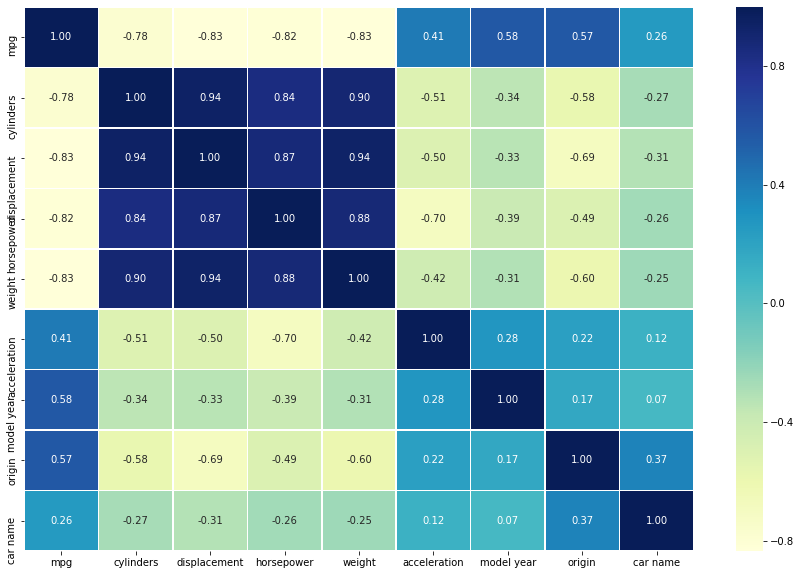

In [33]:
# Plotting Heatmap for Correlation
corr_matrix = df_mpg.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

In [34]:
# Split data into X and y
X = df_mpg.drop("mpg", axis=1)

y = df_mpg["mpg"]

In [35]:
# Independent variables (no target column)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,5.730100,4.875197,3504,12.0,70,0.693147,48
1,8,5.860786,5.111988,3693,11.5,70,0.693147,35
2,8,5.765191,5.017280,3436,11.0,70,0.693147,229
3,8,5.720312,5.017280,3433,12.0,70,0.693147,13
4,8,5.713733,4.948760,3449,10.5,70,0.693147,159


In [36]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(X)
x=pd.DataFrame(x,columns=X.columns)
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1.478570,1.121347,0.809793,0.617878,-1.302413,-1.621860,-0.732388,-1.109139
1,1.478570,1.368221,1.509280,0.840405,-1.488772,-1.621860,-0.732388,-1.256273
2,1.478570,1.187636,1.229510,0.537816,-1.675131,-1.621860,-0.732388,0.939426
3,1.478570,1.102856,1.229510,0.534284,-1.302413,-1.621860,-0.732388,-1.505270
4,1.478570,1.090428,1.027100,0.553122,-1.861491,-1.621860,-0.732388,0.147164
...,...,...,...,...,...,...,...,...
385,-0.867889,-0.212743,-0.266473,-0.034395,0.672996,1.645598,-0.732388,-1.177047
386,-0.867889,-0.354650,-0.399261,-0.222777,0.039374,1.645598,-0.732388,0.056619
387,-0.867889,-0.422854,-0.467962,-0.805584,-1.451500,1.645598,-0.732388,-0.316876
388,-0.867889,-0.643618,-0.647050,-0.417046,1.157530,1.645598,-0.732388,0.124527


In [37]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_random_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state


In [38]:
from xgboost import XGBRegressor

models = {"KNeighborsRegressor": KNeighborsRegressor(n_neighbors=18),
          "SVR": SVR(),
          "LR": LinearRegression(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "SVR":SVR(),
          "RandomForestRegressor":RandomForestRegressor(max_depth=2, random_state=0),
          "GradientBoostingClassifier":GradientBoostingRegressor(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "ElasticNet":ElasticNet(),
          "XGBRegressor":XGBRegressor()
         }
# Create a function to fit and score models
def fit_and_score(models):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        r_state=max_random_score(model)
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.22)
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_train, y_train)
    return model_scores

In [39]:
model_scores = fit_and_score(models=models)

model_scores


max r2 score corresponding to 59 is: 0.9065779295972958
max r2 score corresponding to 59 is: 0.8984282560513233
max r2 score corresponding to 87 is: 0.8766109740391578
max r2 score corresponding to 93 is: 0.8780979652958272
max r2 score corresponding to 59 is: 0.8665342428486729
max r2 score corresponding to 50 is: 0.9352649446389053
max r2 score corresponding to 87 is: 0.8712311249511313
max r2 score corresponding to 87 is: 0.8781568595610022
max r2 score corresponding to 59 is: 0.873225427715009
max r2 score corresponding to 82 is: 0.9190064039030345


{'KNeighborsRegressor': 0.8519009978487755,
 'SVR': 0.8446581405043072,
 'LR': 0.8267914701079788,
 'DecisionTreeRegressor': 1.0,
 'RandomForestRegressor': 0.8080342833148623,
 'GradientBoostingClassifier': 0.9708748036819193,
 'Lasso': 0.7835063067039958,
 'Ridge': 0.8267579974584218,
 'ElasticNet': 0.7709267566727339,
 'XGBRegressor': 0.9999937171901427}

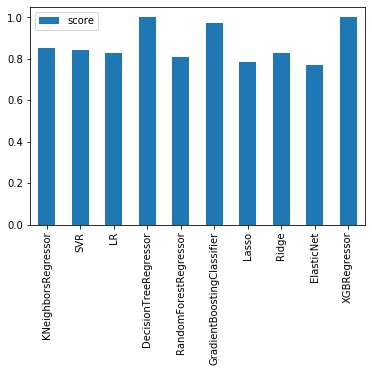

In [40]:
#Plotting bar plot of scores of various models
model_compare = pd.DataFrame(model_scores, index=["score"])
model_compare.T.plot.bar()

In [41]:
#Defining Instances For Differnt Models.
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGBRegressor=XGBRegressor()
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGBRegressor))

Model=[]
Score=[]
R2_score=[]
cvs=[]
mae=[]
mse=[]
Rmse=[]

# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
#   For Loop to Calculate R_2 Score, Cross Val Score.
for name, model in models:
    Model.append(name)
    print(model)
    print('\n')
    r_state=max_random_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')
    Meanabsoluteerror = mean_absolute_error(y_test, y_pred)
    print('Mean absolute error=',Meanabsoluteerror)
    mae.append(Meanabsoluteerror*100)
    print('\n')
    Meansquarederror = mean_squared_error(y_test, y_pred)
    print('Mean squared error=',Meansquarederror)
    mse.append(Meansquarederror*100)
    print('\n')
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean squared error=',RootMeansquarederror)
    Rmse.append(RootMeansquarederror*100)
    print('\n')

        


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 87 is: 0.9153984056790461
R2 Score :  0.9153984056790461


Cross_val_score= 0.6940632055745148


Mean absolute error= 1.613488372093023


Mean squared error= 4.039906976744187


Root Mean squared error= 2.009951983691199


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 59 is: 0.8984282560513233
R2 Score :  0.8984282560513233


Cross_val_score= 0.6166471036248741


Mean absolute error= 1.709701793374673


Mean squared error= 5.266647226421473


Root Mean squared error= 2.2949176949122756


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


max r2 score corresponding to 87 is: 0.8766109740391578
R2 Score :  0.8766

In [42]:
result=pd.DataFrame({'Model':Model,'r2_score':R2_score,'Cross_val_score':cvs,'Mean absolute error':mae,'Mean squared error':mse,'Root Mean squared error':Rmse})
result

,Model,r2_score,Cross_val_score,Mean absolute error,Mean squared error,Root Mean squared error
0,KNeighborsRegressor,91.539841,69.406321,161.348837,403.990698,200.995198
1,SVR,89.842826,61.664710,170.970179,526.664723,229.491769
2,LinearRegression,87.661097,60.034700,194.782318,589.208975,242.736272
3,DecisionTreeRegressor,86.939684,57.103119,210.697674,768.930233,277.295913
4,RandomForestRegressor,93.275116,73.943359,142.381395,395.929700,198.979823
5,GradientBoostingRegressor,93.516295,77.394453,138.013488,381.730167,195.379161
6,AdaBoostRegressor,90.434298,69.007818,171.522196,563.183714,237.314920
7,Lasso,87.123112,48.156784,204.089412,614.898905,247.971552
8,Ridge,87.815686,60.283408,194.504080,581.827041,241.210912
9,ElasticNet,87.322543,50.191583,196.341299,657.345167,256.387435


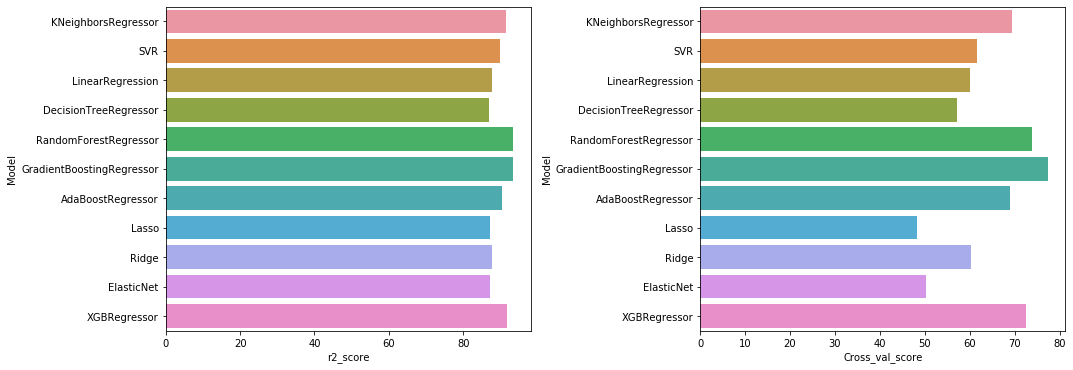

In [43]:
#Plotting bar plot of scores of various models
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
sns.barplot(x = 'r2_score', y = 'Model', data = result)

plt.subplot(3,2,2)
sns.barplot(x = 'Cross_val_score', y = 'Model', data = result)
plt.tight_layout()
plt.show()


In [44]:
#function to evatulate errors
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_test labels vs. y_pred labels.
    """
    r2score = r2_score(y_test, y_preds)
    Meanabsoluteerror = mean_absolute_error(y_test, y_preds)
    Meansquarederror = mean_squared_error(y_test, y_preds)
    RootMeansquarederror = np.sqrt(mean_squared_error(y_test,y_preds))
    metric_dict = {"r2score": round(r2score, 2),
                   "Mean absolute error": round(Meanabsoluteerror, 2),
                   "Mean squared error": round(Meansquarederror, 2), 
                   "Root Mean squared error": round(RootMeansquarederror, 2),
                   }
    print(f"r2score: {r2score * 100:.2f}%")
    print(f"Mean absolute error: {Meanabsoluteerror:.2f}")
    print(f"Mean squared error: {Meansquarederror:.2f}")
    print(f"Root Mean squared error: {RootMeansquarederror:.2f}")

    return metric_dict

# Tuning a model with GridSearchCV


In [45]:
#for getting best set of parameters for GradientBoostingRegressor we will use grid searchCV
from sklearn.model_selection import GridSearchCV
grid1 = {"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}

clfD = GradientBoostingRegressor()

# Setup GridSearchCV
gs_clf1 = GridSearchCV(estimator=clfD,
                      param_grid=grid1,
                      cv=5, # 3-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the GridSearchCV
gs_clf1.fit(x_train, y_train);

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    4.7s finished


In [46]:
# best parameters for GradientBoostingRegressor
print("Best parameter:",gs_clf1.best_params_)
print("score:",gs_clf1.best_score_)

Best parameter: {'learning_rate': 0.01, 'n_estimators': 500}
score: 0.8342828888179323


In [47]:
#checking r2 score using best parameters which calculated from gridsearchCV
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators= 500)
max_random_score(gbr)

max r2 score corresponding to 50 is: 0.9401873287108619


50

In [48]:
#lets use gridsearchcv to find out best parameters for RandomForestRegressor
grid5 = {'n_estimators': [100, 500, 1000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

clf = RandomForestRegressor(n_jobs=1)

# Setup GridSearchCV
gs_clf5 = GridSearchCV(estimator=clf,
                      param_grid=grid5,
                      cv=5, # 5-fold cross-validation
                      verbose=2,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf5.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   32.5s finished


In [49]:
# best parameters for RandomForestRegressor
print("Best parameter:",gs_clf5.best_params_)
print("score:",gs_clf5.best_score_)

Best parameter: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
score: 0.8556030864728624


In [50]:
#checking accuracy score using best parameters which calculated from gridsearchCV
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4)
max_random_score(rf)

max r2 score corresponding to 50 is: 0.9326347536674058


50

In [51]:
from xgboost import XGBRegressor
#lets use gridsearchcv to find out best parameters for XGBRegressor
grid_6 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
          "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
        "min_child_weight" : [ 1, 3, 5, 7 ],
        "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
        "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
clf6 = XGBRegressor()

# Setup GridSearchCV
gs_clf6 = GridSearchCV(estimator=clf6,
                      param_grid=grid_6,
                      cv=5, # 5-fold cross-validation
                      verbose=2,refit=True,n_jobs=-1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf6.fit(x_train, y_train);

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 387 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 3303 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 5493 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 8163 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 11325 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 14967 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  2.1min finished


In [52]:
# best parameters for XGBRegressor
print("Best parameter:",gs_clf6.best_params_)
print("score:",gs_clf6.best_score_)

Best parameter: {'colsample_bytree': 0.5, 'gamma': 0.4, 'learning_rate': 0.15, 'max_depth': 12, 'min_child_weight': 7}
score: 0.8616782843040725


In [53]:
#checking r2 score using best parameters which calculated from gridsearchCV
xgb=XGBRegressor(colsample_bytree= 0.5, gamma= 0.4, learning_rate= 0.15, max_depth= 12, min_child_weight= 7)
max_random_score(xgb)

max r2 score corresponding to 50 is: 0.9294290166875078


50

In [54]:
#using AdaBoostRegressor base_estimator as RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,max_depth=None, min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=4,random_state=50)
ad=AdaBoostRegressor(base_estimator=rf)
ad.fit(x_train, y_train)
y_predrad = ad.predict(x_test)
evaluate_preds(y_test,y_predrad)


r2score: 92.09%
Mean absolute error: 1.57
Mean squared error: 4.51
Root Mean squared error: 2.12


{'r2score': 0.92,
 'Mean absolute error': 1.57,
 'Mean squared error': 4.51,
 'Root Mean squared error': 2.12}

# After all this process conclusion is that GradientBoostingRegressor is performing well.

In [55]:
#lets make our final model
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.22,random_state=50)
gbr=GradientBoostingRegressor(learning_rate=0.01, n_estimators= 500)
gbr.fit(x_train, y_train)
y_predgb = gbr.predict(x_test)
evaluate_preds(y_test,y_predgb)


r2score: 94.04%
Mean absolute error: 1.35
Mean squared error: 3.51
Root Mean squared error: 1.87


{'r2score': 0.94,
 'Mean absolute error': 1.35,
 'Mean squared error': 3.51,
 'Root Mean squared error': 1.87}

Text(0, 0.5, 'Predicted Y')

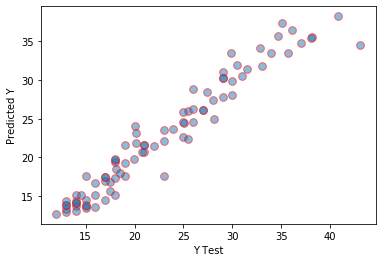

In [56]:
#plot of Y Test and Predicted Y
plt.scatter(x=y_test,y=y_predgb,marker="o",edgecolors ="r",s=60,alpha=0.5)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


Getting linear relatipnship means that our model performes well.


In [57]:
# Printing predicted values
df1 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_predgb})

df1
# On the lest side values are those fields which are taken by machine for test...

,actual values,predictions
108,20.0,24.015240
219,25.5,26.026018
255,25.1,24.477532
150,26.0,24.547900
35,17.0,17.457377
...,...,...
237,30.5,31.945803
385,38.0,35.487356
51,30.0,29.901451
24,21.0,21.540805


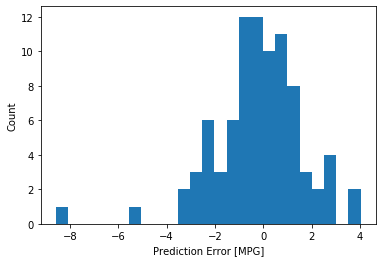

In [58]:
#lets visualize the error
error = y_predgb - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [59]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(y_predgb)
df1.to_csv('Project15_Auto_mpg_submission.csv',index=False)

# Feature importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (mpg) 

In [60]:
# Find feature importance of our best model
gbr.feature_importances_

array([0.09717351, 0.04180416, 0.09995898, 0.57689503, 0.00771961,
       0.15825076, 0.00397497, 0.01422298])

In [61]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:80])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

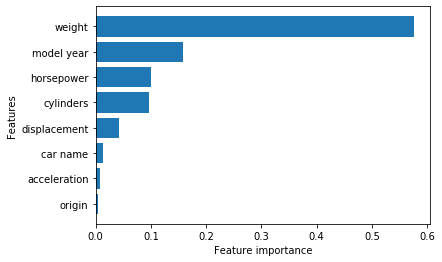

In [62]:
#bar plot of important features 
plot_features(x_train.columns, gbr.feature_importances_)

Looks like weight contribute the most in mpg dataset.

In [63]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(gbr,'Project15_Auto_mpg_submission.pkl')

['Project15_Auto_mpg_submission.pkl']

In [64]:
#read the file using joblib
gbr_from_joblib=joblib.load('Project15_Auto_mpg_submission.pkl')
joblib_y_preds = gbr_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

r2score: 94.04%
Mean absolute error: 1.35
Mean squared error: 3.51
Root Mean squared error: 1.87


{'r2score': 0.94,
 'Mean absolute error': 1.35,
 'Mean squared error': 3.51,
 'Root Mean squared error': 1.87}

# Conclusion